In [1]:
from astrobase import astrokep
from astropy.io import fits
import numpy as np, matplotlib.pyplot as plt

In [2]:
[d for d in dir(astrokep) if not (d.startswith('np') or d.startswith('__'))]

['LCAPERTUREKEYS',
 'LCDATAKEYS',
 'LCHEADERKEYS',
 'LCTOPKEYS',
 'LOGDEBUG',
 'LOGERROR',
 'LOGEXCEPTION',
 'LOGGER',
 'LOGINFO',
 'LOGWARNING',
 'MPI',
 'RandomForestRegressor',
 'SFFDATAKEYS',
 'SFFHEADERKEYS',
 'SFFTOPKEYS',
 '_epd_function',
 '_epd_residual',
 'consolidate_kepler_fitslc',
 'datetime',
 'epd_kepler_lightcurve',
 'filter_kepler_lcdict',
 'find_lightcurve_gaps',
 'flux_ppm_to_magnitudes',
 'format_exc',
 'gzip',
 'kepler_lcdict_to_pkl',
 'keplerflux_to_keplermag',
 'keplermag_to_keplerflux',
 'keplermag_to_sdssr',
 'leastsq',
 'logging',
 'medfilt',
 'os',
 'pickle',
 'plt',
 'pyfits',
 'read_k2sff_lightcurve',
 'read_kepler_fitslc',
 'read_kepler_pklc',
 'rfepd_kepler_lightcurve',
 'set_logger_parent',
 'stitch_lightcurve_gaps',
 'unixtime']

In [3]:
print(astrokep.RandomForestRegressor.__doc__[:1000])

A random forest regressor.

    A random forest is a meta estimator that fits a number of classifying
    decision trees on various sub-samples of the dataset and use averaging
    to improve the predictive accuracy and control over-fitting.
    The sub-sample size is always the same as the original
    input sample size but the samples are drawn with replacement if
    `bootstrap=True` (default).

    Read more in the :ref:`User Guide <forest>`.

    Parameters
    ----------
    n_estimators : integer, optional (default=10)
        The number of trees in the forest.

    criterion : string, optional (default="mse")
        The function to measure the quality of a split. Supported criteria
        are "mse" for the mean squared error, which is equal to variance
        reduction as feature selection criterion, and "mae" for the mean
        absolute error.

        .. versionadded:: 0.18
           Mean Absolute Error (MAE) criterion.

    max_features : int, float, string or None, op

In [4]:
! ls ../data/morph_gt0.6_kepler_MAST | grep -v 'kplr'

part1.sh
part2.sh
part3.sh
part4.sh
trial


(note the above grep magic to invert a search. `-v` means "give me everything not matching the following string"

In [5]:
import os
datdir = '../data/morph_gt0.6_kepler_MAST/trial/'
fs = [datdir+f for f in os.listdir(datdir) if f.endswith('.fits')]

In [6]:
lcd = astrokep.read_kepler_fitslc(fs[0])

In [7]:
lcd.keys()

dict_keys(['obsmode', 'varinfo', 'sap_bkg', 'objectinfo', 'mom_centr1', 'skygroup', 'psf_centr1', 'sap_bkg_err', 'sap_flux_err', 'channel', 'psf_centr1_err', 'mom_centr2_err', 'quarter', 'mom_centr2', 'objectid', 'output', 'module', 'season', 'pdcsap_flux', 'sap_flux', 'psf_centr2_err', 'mom_centr1_err', 'datarelease', 'timecorr', 'psf_centr2', 'time', 'cadenceno', 'columns', 'sap_quality', 'lcinfo', 'pdcsap_flux_err'])

In [8]:
for k in lcd.keys():
    print(k,)

obsmode
varinfo
sap_bkg
objectinfo
mom_centr1
skygroup
psf_centr1
sap_bkg_err
sap_flux_err
channel
psf_centr1_err
mom_centr2_err
quarter
mom_centr2
objectid
output
module
season
pdcsap_flux
sap_flux
psf_centr2_err
mom_centr1_err
datarelease
timecorr
psf_centr2
time
cadenceno
columns
sap_quality
lcinfo
pdcsap_flux_err


<IPython.core.display.Javascript object>


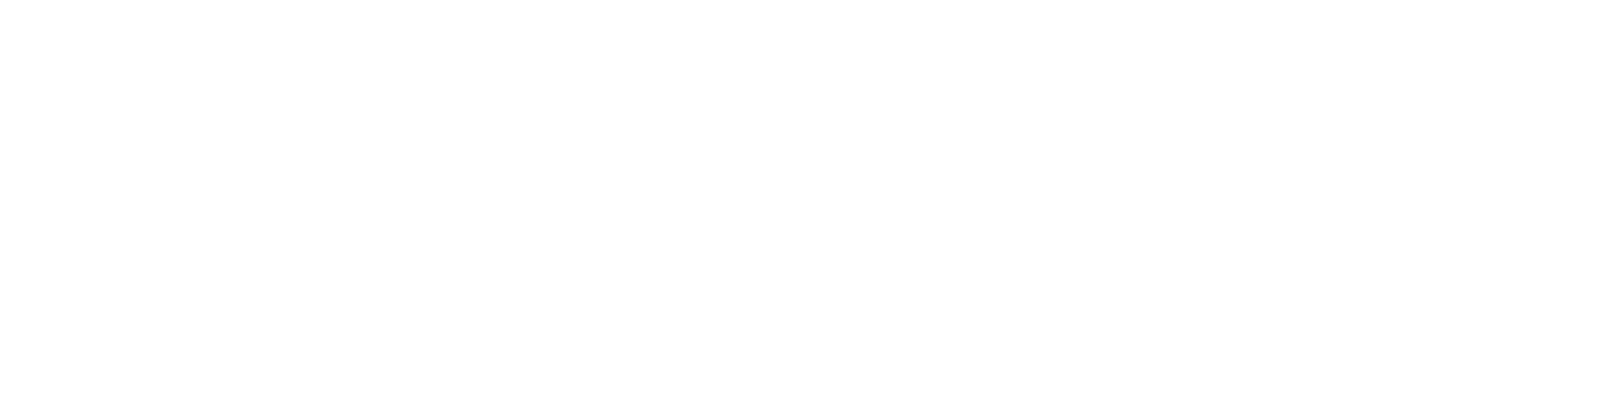

In [9]:
%matplotlib notebook
f, ax = plt.subplots(figsize=(20,5))
ax.plot(lcd['time'], lcd['sap_flux'], 'k-o', ms=4)
f.show()

SAP light curves: simple aperture photometry.
UNITS: electrons read-out in the detector, per second.

SAP light curves: not corrected for most known instrumental effects.

Following discussion with Waqas:

"It's probably fine to start with PDC data". The earlier versions of PDC data likely removed the kind of _instrinsic_ variability (contact EB variability) that we're interested in removing.

OFC an issue is that if we're going to do injection-recovery start to finish, starting with SAP_PDC is smarter because it means we'll be able to avoid the doubt of "well, what if PDC removed the variability we're interested in?"

So start with SAP data, NOT the PDC data.

For detrending, the relevant software to study is `PyKE` ("pike"), the things that Suzanne Aigrain's group is producing (open source & python), and possibly (?) Everest.

Eg. Armstrong et al 2014 talk about what to do with PyKE


In [10]:
%matplotlib notebook
f, axs = plt.subplots(nrows=2, ncols=1, figsize=(20,10))
axs[0].plot(lcd['time'], lcd['sap_flux'], 'k-o', ms=4)
axs[1].plot(lcd['time'], lcd['pdcsap_flux'], 'k-o', ms=4)
f.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


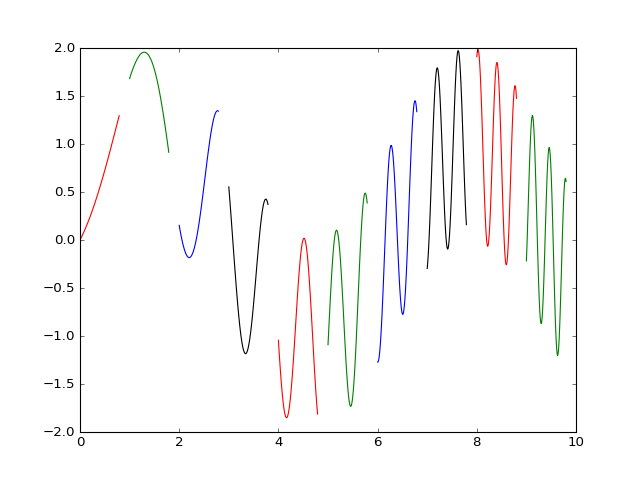

In [13]:

f, ax = plt.subplots()


ax.plot()


# Tweak spacing between subplots to prevent labels from overlapping
f.subplots_adjust(hspace=0.3)
f.show()